# Practical Session 1 - High level view of ML

This is the first practical session. In this session we will see how to set up a machine learning problem.
We will first generate a toy problem to have control over our data and plot it.

Then we will see how to fit an easy model. We will then compute its mean error, plot its prediction and see what happens when changing the data

Finally, we will use more powerful model and redo this analysis.

## A dummy regression task

### Generating data
Let us assume that our data is just some samples 'x' and the underlying hidden relationship is a simple function of x :
$y(x) = 1.3 x^3 - 3x^2 + 3.6*x + 6.9$
We want to take random points in a certain range uniformly, which can be done with np.random.uniform.

Get 100 random points between -1 and 3. Compute their label. Also create a noisy version of these : you can do so by adding small noise (take the default settings).

In [11]:
import numpy as np
np.random.seed(20)


def base_function(x):
    y = 1.3 * x ** 3 - 3 * x ** 2 + 3.6 * x + 6.9
    return y


low, high = -1, 3
n_points = 100

# Generate the toy data here
toy_data = np.random.uniform(low, high, n_points)
# print(toy_data)
# print(len(toy_data))

toy_label = base_function(toy_data)
# print(toy_label)
# print(len(toy_label))

# Add noise
noise = np.random.uniform(-1, 1, n_points)
toy_data_w_noise = toy_label + noise
print(toy_data_w_noise)

[10.14851133 18.46884522 18.05902524 14.60891503  0.58981207 11.75595943
  7.88311407  8.65968959 10.26671992  5.77446898  7.52398552 11.04852151
 13.98210569 15.75381923 14.2026848   0.10088814  4.54390156 12.24700119
  5.90833479  7.4304447  17.5861326  21.00143316  8.71959375  5.52476755
 13.64596323  9.70009197 10.85561372 15.92723576  8.47192481  8.6698527
 11.20843732 10.77063833  7.62371284  1.92896187 14.04455222  9.27787831
  7.29640938  9.13855101  7.77783104  6.62959232  9.11675113 10.18685178
  8.27055955  8.70532206  7.74460341  8.89863055  4.40618349 10.09197741
 15.11184046  5.58250166 12.03844846  7.8604739  13.15494882 14.64353948
 14.11563282 10.48296987 10.90956159 10.23160777  7.65604245  8.89193073
  8.62690822  0.3661405  11.65848973 10.66678616 13.69707033  8.72632469
  8.43983722  8.34728012  9.93486812  3.377874    9.64632914 21.16777725
 19.24882035 17.68271124  7.73911225 11.58736491  9.35554194 10.99481529
  7.03354514 10.62060075  1.4193404  10.77218319  6.

### Plotting our data
The most used plotting tool for Python is matplotlib.pyplot, also often complemented by seaborn.
You should use the functions plot (draw a line) and scatter (draw points) for most of this class.

To plot a function, the most common way is to generate evenly spaced points using np.linspace. Then you can transform them with your function and use plot to see your function. Plot the base function in the interval [-1, 3]

Also plot the data you generated using a scatter plot.

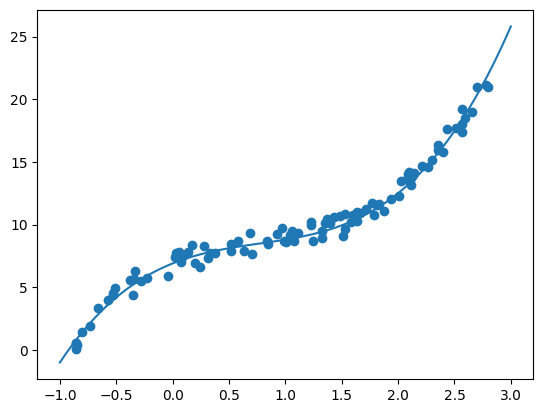

In [12]:
import matplotlib.pyplot as plt

np.linspace(low, high, n_points)
plt.plot(np.linspace(low, high, n_points), base_function(np.linspace(low, high, n_points)))

plt.scatter(toy_data, toy_data_w_noise)
plt.show()

### Fitting a simple model : Linear Regression

Use scikit learn LinearRegression object to fit a model on your noisy samples.
Once fitted, plot the resulting model along with the samples. Does this look good to you ?

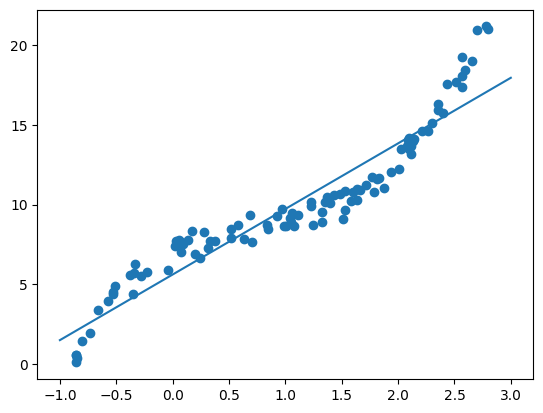

In [13]:
from sklearn import linear_model

lsp_x = np.linspace(low, high, n_points)
lsp_y = base_function(lsp_x)
xs = toy_data[:, None]
model = linear_model.LinearRegression()
model.fit(xs, toy_data_w_noise)
predicted_lsp = model.predict(lsp_x.reshape(-1, 1))
plt.scatter(xs, toy_data_w_noise)
plt.plot(lsp_x, predicted_lsp)

### Quantitative assessment of the quality

We want to know how good/bad is our model. To do so we will use numpy to compute the mean absolute difference over our samples.

In [14]:
#  Mean Absolute Error (MAE). The formula is the following:
#  MAE = 1/n * sum(|y_pred - y_true|)
#  Compute the MAE for your model.

mae = np.mean(np.abs(predicted_lsp - toy_data_w_noise))
print(mae)

5.236455769257228


This is hard to interpret per se. However we can see what would happen if the noise around the model would be greatly augmented. Generate a new set of labels with a noise sampled with a scale parameter of 3.

In [15]:
noise = np.random.uniform(0, 3, n_points)
toy_data_w_noise = toy_data + noise

mae = np.mean(np.abs(predicted_lsp - toy_data_w_noise))
print(mae)


7.322660720749786


### Towards a more complicated model : a first neural network

Let us now go back to our original data. 

We want to replace the previous simple linear model, with a very simple neural network. We don't have to code it, there exist an easy one already implemented in scikit learn : MLPRegressor(max_iter=5000). 
Redo the same plot as before and see how the fit now looks better.

You can try changing the number of iterations or playing a bit with the parameters and see the impact on the fit. 

1.5087722478843484


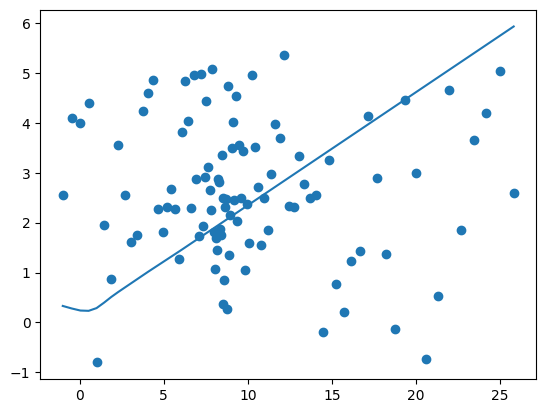

In [16]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(max_iter=5000, learning_rate = 'adaptive')
model.fit(lsp_y.reshape(-1, 1), toy_data_w_noise)
predicted_lsp = model.predict(lsp_y.reshape(-1, 1))
plt.scatter(lsp_y, toy_data_w_noise)
plt.plot(lsp_y, predicted_lsp)
mae = np.mean(np.abs(predicted_lsp - toy_data_w_noise))
print(mae)

#### Added by me

In [17]:
# 2.2.2. Polynomial regression

# We will now try to fit a polynomial function to our data. To do so, we will use the PolynomialFeatures object from scikit learn. This object will transform our data into a polynomial form. For example, if we have a 1D data, it will transform it into a 2D data by adding a new dimension which is the square of the first one. If we have a 2D data, it will add a new dimension which is the product of the two first ones. And so on.

# Use the PolynomialFeatures object to transform your data into a polynomial form. Then fit a linear regression model on this new data. Plot the resulting model along with the samples. Does this look good to you ?

# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2)
# xs = toy_data[:, None]
# xs_poly = poly.fit_transform(xs)
# model = linear_model.LinearRegression()
# model.fit(xs_poly, toy_data_w_noise)
# predicted_lsp = model.predict(xs_poly)
# plt.scatter(xs, toy_data_w_noise)
# plt.plot(xs, predicted_lsp)
# mae = np.mean(np.abs(predicted_lsp - toy_data_w_noise))
# print(mae)

### Back to class

Compute the mean absolute difference as before. What can you say about the metrics ?

1.461911552911508


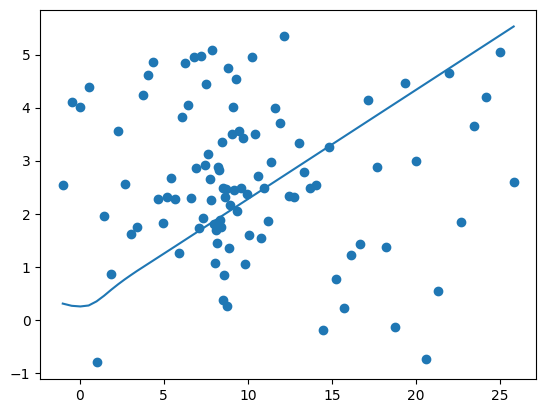

In [18]:
# Now we want to see how the model would behave on a new dataset. Generate a new dataset and plot it along with the model. What do you observe ?

# You can try changing the number of iterations or playing a bit with the parameters and see the impact on the fit.

model = MLPRegressor(max_iter=5000, learning_rate='adaptive')
model.fit(lsp_y.reshape(-1,1), toy_data_w_noise)
predicted_lsp = model.predict(lsp_y.reshape(-1,1))
plt.scatter(lsp_y, toy_data_w_noise)
plt.plot(lsp_y, predicted_lsp)
mae = np.mean(np.abs(predicted_lsp - toy_data_w_noise))
print(mae)
